# Pendahuluan

In [1]:
# Library yang dibutuhkan

# Pertama-tama, import terlebih dahulu library yang dibutuhkan, antara lain secara berurutan adalah :
# json,
# numpy,
# pandas, dan
# requests.

# Library numpy dan pandas diimport sebagai aliasnya.

import json
import numpy as np
import pandas as pd
import requests
from pandas import json_normalize

# Mengakses Data Covid-19 dari https://covid19-api.org

In [2]:
# Membuat Fungsi get API

# Buat fungsi python get_json dengan parameter api_url. fungsi ini akan mengembalikan value berupa python dictionary. 
# Jika status_code yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah None.

def get_json(api_url):
 response = requests.get(api_url)
 if response.status_code == 200:
  return json.loads(response.content.decode('utf-8'))
 else:
  return None

In [3]:
# Memanggil API Covid-19

# Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. 
# Gunakan parameter record_date untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. 
# Untuk kasus ini, gunakan record_date '2020-08-17', dan masukkan hasil respon api ke variable df_covid_worldwide.

# Untuk mendapatkan dataframe covid19, gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, 
# yaitu get_json() Print sample data covid dengan menggunakan head() function.

record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


In [4]:
# Merubah Format date

# Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format YYYY-mm-dd HH:MM:SS. 
# Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.

df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [5]:
# Mengambil Data Countries

# Buatlah dataframe countries dengan memanggil variable countries_url ke api covid19-api.org. 
# Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.

# Akhirnya cetaklah lima data teratas dari dataframe countries (df_countries).

countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]
print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


# Kasus Covid-19 di Dunia dan Negara Mana yang Tertinggi

In [6]:
# Merge Covid-19 Data dan Countries

# Selanjutnya adalah mapping data covid19 dan data country. 
# Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. 
# Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().

df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


In [7]:
# Menghitung Fatality Ratio

# Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [8]:
# Negara-negara dengan Fatality Ratio Tertinggi

# Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

In [9]:
# Import Library Visualisasi

# Importlah library matplotlib.pyplot sebagai aliasnya plt.

import matplotlib.pyplot as plt

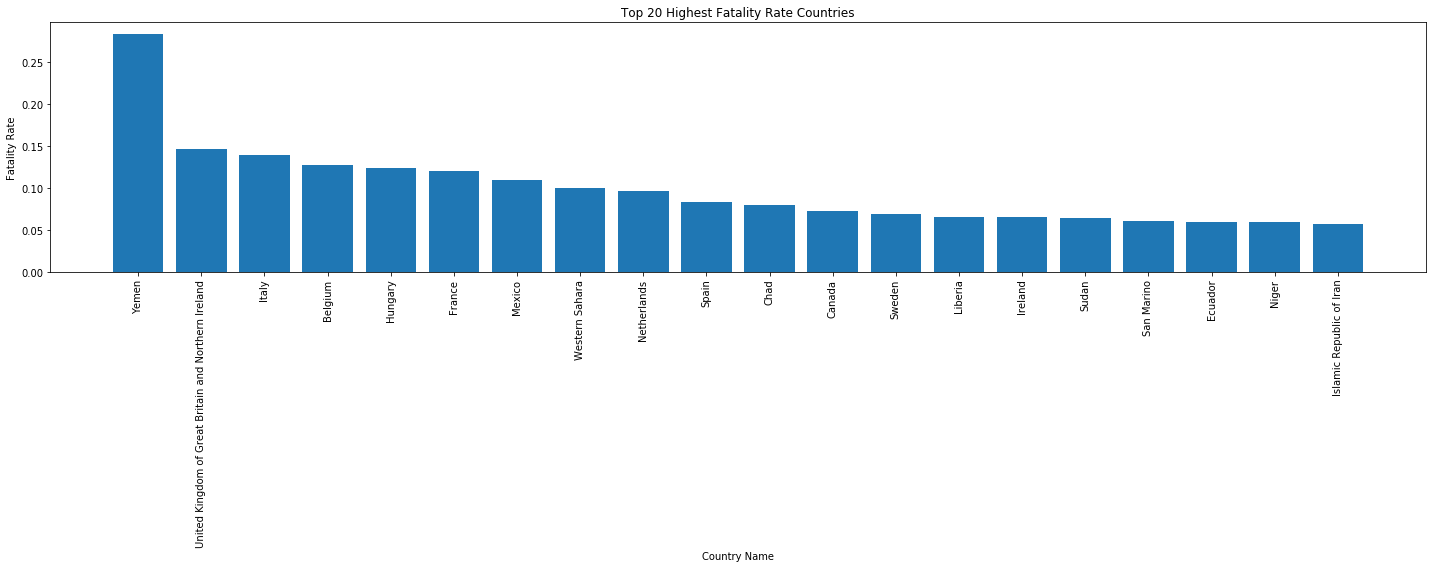

In [10]:
# Visualisasi Negara dengan Fatality Ratio Tertinggi

# Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19, 
# dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.

# Variabel x axis adalah kolom name, dan kolom y atau value nya adalah kolom fatality_ratio 
# dan gunakan fungsi plt.bar([value x axis, value y axis]).

# Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.

plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Kasus Covid-19 di ASEAN

In [13]:
# Menggabungkan Dataframe

# Selanjutnya adalah membandingkan kasus covid-19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:
# MY -> Malaysia,
# SG -> Singapure,
# TH -> Thailand,
# VN -> Vietnam.
# Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.

# Gunakan fungsi pd.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().

# Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.

# Cetaklah lima data teratas dari dataframe yang telah dibentuk.

countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1

print(df_covid_timeline_merged.head())

  country last_update  cases  deaths  recovered
0      VN  2021-03-04   2482      35       1898
1      VN  2021-03-03   2482      35       1898
2      VN  2021-03-02   2472      35       1898
3      VN  2021-03-01   2448      35       1876
4      VN  2021-02-28   2448      35       1876


In [14]:
# Merge Data Covid-19 Dengan Data Country

# Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.

df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [15]:
# Kasus Covid-19 di ASEAN pada Bulan Maret 2020

# Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yang diambil. 
# Format datetime.date menggunakan format YYYY, mm, dd.

import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]